# This notebook is for eda

### It encompasses normality tests and summary statistics for different features, together with visualisations

In [1]:
from mpl_toolkits import mplot3d
import pandas as pd
import os
from scipy import stats
import plotly.express as px
import plotly
import numpy as np
import seaborn as sns
from scipy.stats import norm, anderson
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
sns.set()
# ------------GLOBALS-------------
alpha = 0.05
PROC_DATA_PATH = '~/library/data/processed/'
qualif_features = ['NVQ4_rate', 'youth_unemployment_rate', 'no_qualif_rate',
                   'NVQ3_rate', 'NVQ2_rate', 'NVQ1_rate', 'group_qualif']
econ_features = ['3_year_survival_rate', 'job_density',
                 '3_year_survival_number', 'number_of_jobs',
                 'youth_unemployment_rate', 'group_econ']


# ------------FUNCTIONS-----------
def normality_tests(df):
    shap_arr = []
    k2_arr = []
    andr_arr = []
    for col in range(len(df.columns)):

        stat, p = stats.shapiro(df[df.columns[col]])

        if p <= alpha:
            shap_arr.append((df.columns[col], stat, p))

        stat, p = stats.normaltest(df[df.columns[col]])

        if p <= alpha:
            k2_arr.append((df.columns[col], stat, p))

        result = anderson(df[df.columns[col]])
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic >= result.critical_values[i]:
                andr_arr.append((df.columns[col], sl, cv))

    if len(shap_arr) != 0:
        print("List of features that did not pass the Shapiro test is",
              end='\n')
        print("{:30s}{:13s}{:11s}".format("Feature name", "W-statistic",
                                          "p-value"), end='\n')
        [print("{:30s} {:4f} {:10f}".format(col, x, y)) for col, x, y in
         [elem for elem in shap_arr]]
    print()
    if len(k2_arr) != 0:
        print(
            "List of features that did not pass the k\N{SUPERSCRIPT TWO} test is",
            end='\n')
        print("{:30s}{:15s}{:11s}".format("Feature name", "test statistic",
                                          "p-value"), end='\n')
        [print("{:30s} {:10f} {:10f}".format(col, x, y)) for col, x, y in
         [elem for elem in k2_arr]]
    print()
    if len(andr_arr) != 0:
        print("List of features that did not pass the Anderson test is",
              end='\n')
        print("{:26s}{:20s}{:18s}".format("Feature name", "significance level",
                                          "critical values"), end='\n')
        [print("{:30s} {:10f} {:15f}".format(col, x, y)) for col, x, y in
         [elem for elem in andr_arr]]
    print()


In [2]:
df = pd.read_csv(PROC_DATA_PATH + 'youth_data_labelled.csv', sep=',', index_col=0)

In [3]:
# this df holds only qualification data
df_0 = df[qualif_features]

In [4]:
#check the type of data available
df_0.dtypes

NVQ4_rate                  float64
youth_unemployment_rate    float64
no_qualif_rate             float64
NVQ3_rate                  float64
NVQ2_rate                  float64
NVQ1_rate                  float64
group_qualif                 int64
dtype: object

In [5]:
# this df holds only economic data
df_1 = df[econ_features]

In [6]:
df_1.dtypes

3_year_survival_rate       float64
job_density                float64
3_year_survival_number     float64
number_of_jobs               int64
youth_unemployment_rate    float64
group_econ                   int64
dtype: object

In [7]:
df

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3,2,0
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5,0,1
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2,1,0
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2,2,0
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5,0,1
5,Camden,2011,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0,8.2,7.2,5.2,3,0
6,Croydon,2011,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2,12.0,16.5,12.0,2,0
7,Ealing,2011,1270.0,57.5,148000,0.63,10.0,54.7,12.986582,5.9,13.8,7.4,6.8,0,0
8,Enfield,2011,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4,13.0,12.5,12.5,2,0
9,Greenwich,2011,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6,14.0,10.7,9.0,2,0


For geographic data we have different scales of measure for variables.

### Every year the rate of youth unemployment in London diminshed by ~2.5 percentiles between 2011 and 2014

In [8]:
df.groupby('year')['youth_unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,32.0,13.942957,4.266555,5.739796,10.720227,13.426262,17.525762,22.734367
2012,32.0,11.059617,3.646945,4.798762,8.004415,10.203964,14.000575,17.159529
2013,32.0,7.944732,2.514514,3.981886,5.846268,7.743836,10.007474,12.413395
2014,32.0,5.127005,1.588868,2.771333,3.576057,5.117404,6.340278,7.957366


#### Let's run some normality tests to determine the nature of our data.

In [9]:
normality_tests(df_1)

List of features that did not pass the Shapiro test is
Feature name                  W-statistic  p-value    
3_year_survival_rate           0.964149   0.001825
job_density                    0.553262   0.000000
3_year_survival_number         0.795482   0.000000
number_of_jobs                 0.610680   0.000000
youth_unemployment_rate        0.945228   0.000057
group_econ                     0.702237   0.000000

List of features that did not pass the k² test is
Feature name                  test statistic p-value    
3_year_survival_rate            22.490111   0.000013
job_density                    123.116328   0.000000
3_year_survival_number          78.393708   0.000000
number_of_jobs                 114.946483   0.000000
youth_unemployment_rate          9.721777   0.007744
group_econ                       9.377673   0.009197

List of features that did not pass the Anderson test is
Feature name              significance level  critical values   
job_density                     15.0

The lists for K$^2$ and Shapiro tests are identical; this means that none of the data that we have is normally distributed. 

A note on the p-values which seem to be null (i.e. 0.000000): they are not. The values have been formatted to support up to 6 digits after floating point, and 0.000000 just means that the p-value is less than c * 10$^-$$^6$, where c is some digit

In [10]:
normality_tests(df_0)

List of features that did not pass the Shapiro test is
Feature name                  W-statistic  p-value    
NVQ4_rate                      0.973384   0.012637
youth_unemployment_rate        0.945228   0.000057
NVQ2_rate                      0.932421   0.000007
NVQ1_rate                      0.937395   0.000016
group_qualif                   0.782038   0.000000

List of features that did not pass the k² test is
Feature name                  test statistic p-value    
youth_unemployment_rate          9.721777   0.007744
NVQ2_rate                       17.626033   0.000149
NVQ1_rate                       14.524194   0.000702

List of features that did not pass the Anderson test is
Feature name              significance level  critical values   
NVQ4_rate                       15.000000        0.559000
NVQ4_rate                       10.000000        0.637000
NVQ4_rate                        5.000000        0.764000
youth_unemployment_rate         15.000000        0.559000
youth_unemploy

NVQ3 rates seem to be normally distributed. Will need to investigate further the distribution of no qualif rates and NVQ4 

<Figure size 432x288 with 0 Axes>

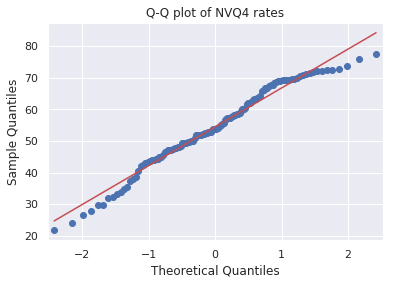

In [11]:
fig = plt.figure() 
fig = qqplot(df_0['NVQ4_rate'], line='s')
plt.title('Q-Q plot of NVQ4 rates')
plt.show()

Indeed with the exception of a few outliers most of the data fall about a straight line. Considering NVQ4 to be normally distributed seems like a fairly safe assumption

<Figure size 432x288 with 0 Axes>

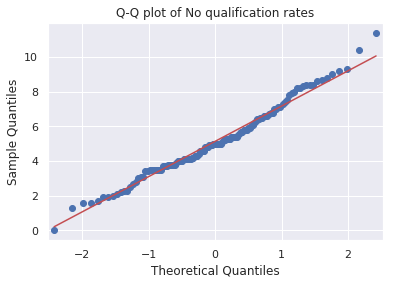

In [12]:
fig = plt.figure() 
qqplot(df_0['no_qualif_rate'], line='s')
plt.title('Q-Q plot of No qualification rates')
plt.show()

Same case with no qualifications rate. The data plotted falls very tightly on the 45 degree angle line

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



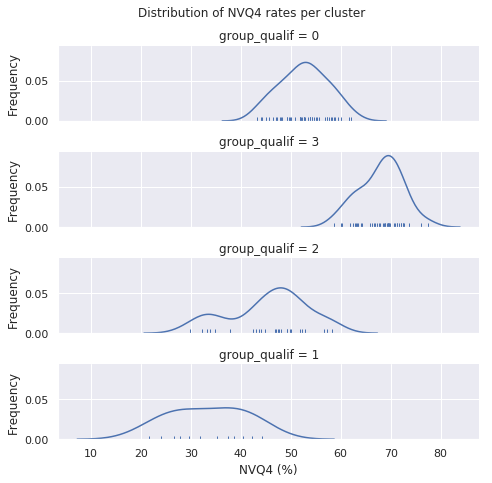

In [13]:
ordered_ = df_0.group_qualif.value_counts().index
g = sns.FacetGrid(df_0, row="group_qualif", row_order=ordered_,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "NVQ4_rate", hist=False, rug=True)
g.fig.suptitle("Distribution of NVQ4 rates per cluster")
g.set_axis_labels("NVQ4 (%)", "Frequency");
g.fig.subplots_adjust(top=.9)

Although densities varry quite a bit among clusters, it would still be worth taking a look in particular at clusters 1 and 3, due to the vast difference in the distribution of their NVQ4 rates

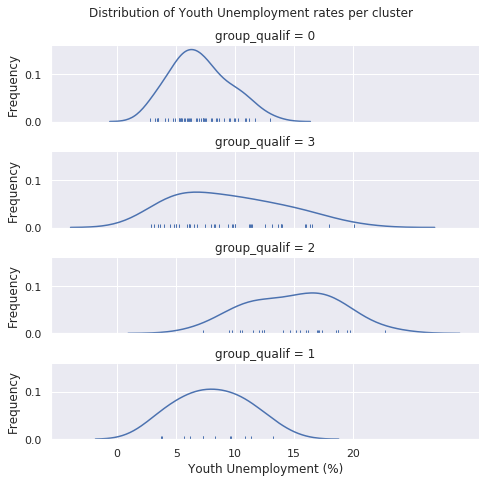

In [14]:
ordered_ = df_0.group_qualif.value_counts().index

g = sns.FacetGrid(df_0, row="group_qualif", row_order=ordered_,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "youth_unemployment_rate", hist=False, rug=True)
g.set_axis_labels("Youth Unemployment (%)", "Frequency");
g.fig.suptitle("Distribution of Youth Unemployment rates per cluster")
g.set(xticks=[0, 5, 10, 15, 20])
g.fig.subplots_adjust(top=.9, hspace=.4)

Although NVQ4 rates differ a lot among group 1 and 3, youth unemployment rates between the two clusters are not that different.

Let's check more closely what's happening in each cluster:

In [15]:
df_0.groupby(['group_qualif']).agg(['mean', 'std', 'min', 'max']).T

group_qualif                          0          1          2          3
NVQ4_rate               mean  52.641667  33.333333  45.538462  68.038095
                        std    4.781695   7.452435   7.883303   4.304108
                        min   43.300000  21.700000  29.800000  58.600000
                        max   62.100000  44.300000  58.200000  77.400000
youth_unemployment_rate mean   7.029022   8.075063  14.859754   9.469774
                        std    2.436518   2.979325   3.821144   4.536211
                        min    2.771333   3.753999   7.251567   2.865119
                        max   12.986582  13.190116  22.734367  20.111833
no_qualif_rate          mean   4.531250   4.641667   7.746154   4.354762
                        std    1.553055   1.518048   1.584482   1.602468
                        min    1.300000   2.700000   5.000000   0.000000
                        max    7.300000   8.400000  11.400000   7.800000
NVQ3_rate               mean  14.097917  18.108333  12.592308   9.157143
                        std    2.185298   2.231371   2.376034   1.890302
                        min    8.600000  14.200000   7.200000   5.700000
                        max   18.900000  21.500000  17.800000  13.100000
NVQ2_rate               mean  10.810417  19.658333  12.707692   6.588095
                        std    1.925334   2.998017   2.581770   1.538641
                        min    6.800000  14.100000   8.200000   4.300000
                        max   14.200000  23.100000  19.200000  10.900000
NVQ1_rate               mean   7.731250  13.800000   8.826923   4.800000
                        std    2.097329   2.571876   3.031245   1.370419
                        min    3.500000   8.900000   4.000000   1.800000
                        max   12.600000  18.000000  14.300000   7.700000

Group 0: lowest unemployment rate, 

Group 1: lowest NVQ4 rate, 2nd lowest youth unemployment rate, highest NVQ3_rate, NVQ2, NVQ1

Group 2: Highest unemployment rate, highest no qualif

Group 3: Highest NVQ4, lowest no_qualif, 3rd lowest youth unemployment rate, lowest NVQ3, NVQ2, NVQ1

A minimum of 0 for no_qualif_rate looks strange. Let's see what this is all about

In [16]:
df.iloc[df_0.index[df_0['no_qualif_rate'] == 0]]

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
121,Richmond upon Thames,2014,1270.0,64.0,95000,0.76,4.5,72.5,2.865119,0.0,12.0,6.9,3.0,3,1


Indeed there seems to be an entry with no_qualif_rate = 0, which is quite strange. However, when looking at the dataset description a note can be noticed on the no_qualif_rate field. Values < 1 were rounded to 0. That note must be for this entry here.

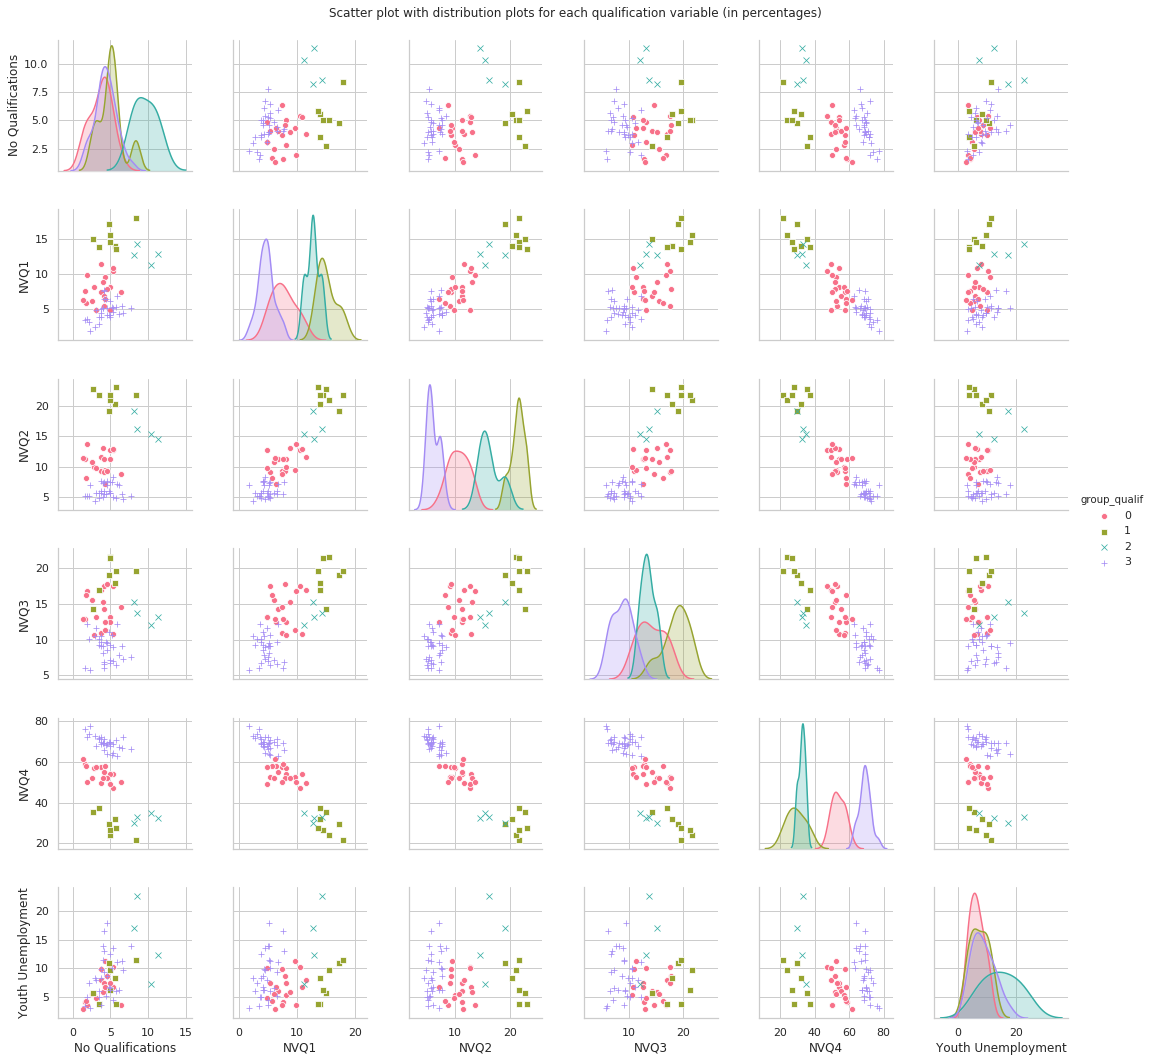

In [111]:
# check how kmeans split the data into clusters
replacements = {'no_qualif_rate': 'No Qualifications','NVQ1_rate': 'NVQ1' , 'NVQ2_rate': 'NVQ2'
                ,'NVQ3_rate': 'NVQ3', 'NVQ4_rate': 'NVQ4', 'youth_unemployment_rate': 'Youth Unemployment',
               'group_qualif': 'group'}
sns.set_style('whitegrid')
g = sns.pairplot(df_0, diag_kind='kde', hue='group_qualif',
                   palette="husl", diag_kws=dict(shade=True),
                   vars=['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate','youth_unemployment_rate'],
                markers=["o","s","x","+"])

# change axes labels
for i in range(6):
    for j in range(6):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

#TODO change Legends
for i in range(len(g.fig.get_children()[-1].texts)):
    label = g.fig.get_children()[-1].texts[i].get_text()
    if label in replacements.keys():
        g.fig.get_children()[-1].texts[i].set_text(replacements[label])
g.fig.suptitle('Scatter plot with distribution plots for each qualification variable (in percentages)')
g.fig.subplots_adjust(top=.95)

NVQ4 seems to be strongly correlated with NVQ1, 2 and 3. At this point we should check for collinearity within variables, as this might impact our multiple linearity regression. Let's see how a correlation matrix looks like here

Text(0.5, 1.0, 'Correlation heatmap of qualification features')

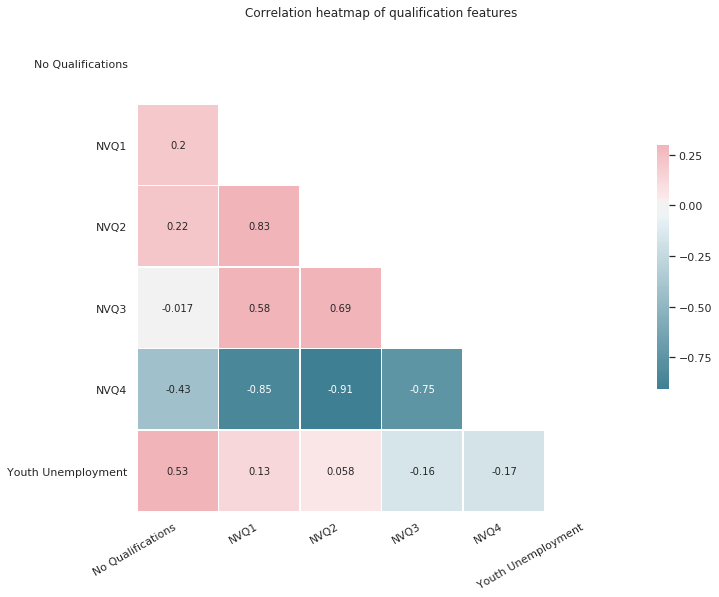

In [18]:
corr = df_0[['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate','youth_unemployment_rate']].corr()
labels=['No Qualifications','NVQ1' , 'NVQ2' ,'NVQ3', 'NVQ4','Youth Unemployment']

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# decorate
g.set_xticklabels(labels=labels, rotation=30, ha='right')
g.set_yticklabels(labels=labels, rotation=0, ha='right')
g.set_title('Correlation heatmap of qualification features')

As expected NVQ1,2,3 are strong predictors for NVQ4. These variables should then be excluded from the MLR. We can also see that lack of education seems to be highest correlated with youth unemployment out of the qualification variables

Let's clear the datasets a bit and see what boroughs belong fully to a cluster, so we can better understand the properties of the clusters created. We aim to have 4 entries per borough for each cluster (because the number of entries between 2011 and 2014 for each boroughs is 4)

In [19]:
df.groupby('group_qualif')['area'].value_counts()

group_qualif  area                  
0             Barnet                    4
              Bromley                   4
              Harrow                    4
              Kingston upon Thames      4
              Merton                    4
              Ealing                    3
              Brent                     2
              Croydon                   2
              Enfield                   2
              Greenwich                 2
              Hillingdon                2
              Hounslow                  2
              Lewisham                  2
              Redbridge                 2
              Sutton                    2
              Tower Hamlets             2
              Hackney                   1
              Haringey                  1
              Newham                    1
              Richmond upon Thames      1
              Waltham Forest            1
1             Bexley                    4
              Havering                 

In [20]:
group = df['group_qualif'].unique().tolist()
arr = []
boroughs = []
for group in df['group_qualif'].unique().tolist():
    arr.append(df[df['group_qualif'] == group]['area'].mode())

for item in arr:
    for elem in item:
        boroughs.append(elem)

# x contains all the boroughs with highest frequencies
x = df[df['area'].isin(boroughs)]

In [21]:
df_0 = x[qualif_features]
df_0.groupby(['group_qualif']).agg(['mean', 'std', 'min', 'max']).T

group_qualif                          0          1          2          3
NVQ4_rate               mean  53.930000  29.300000  32.525000  69.312500
                        std    3.849279   5.382511   2.090255   3.348351
                        min   47.100000  21.700000  29.800000  63.100000
                        max   61.600000  37.400000  34.800000  77.400000
youth_unemployment_rate mean   6.601864   7.440446  14.889714   8.821507
                        std    2.489504   3.039341   6.612213   3.872093
                        min    2.771333   3.753999   7.251567   3.092845
                        max   11.218130  11.388736  22.734367  17.959095
no_qualif_rate          mean   3.740000   5.100000   9.650000   4.396875
                        std    1.410636   1.692842   1.508863   1.415464
                        min    1.300000   2.700000   8.200000   1.600000
                        max    6.400000   8.400000  11.400000   7.800000
NVQ3_rate               mean  14.135000  18.737500  13.500000   8.765625
                        std    2.411873   2.398176   1.334166   1.832257
                        min   10.600000  14.200000  12.000000   5.700000
                        max   17.700000  21.500000  15.200000  12.200000
NVQ2_rate               mean  10.670000  21.512500  16.375000   6.021875
                        std    1.829610   1.278881   2.007278   1.079347
                        min    7.100000  19.200000  14.600000   4.300000
                        max   13.700000  23.100000  19.200000   8.300000
NVQ1_rate               mean   7.730000  15.212500  12.800000   4.737500
                        std    1.990001   1.610180   1.227464   1.376707
                        min    4.800000  13.600000  11.300000   1.800000
                        max   11.500000  18.000000  14.300000   7.700000

Couple of remarks: 
    
    Group 0: lowest youth unemployment & no qualif rates

    Group 1: lowest NVQ4, 2nd lowest youth unemployment, highest NVQ1,2,3

    Group 2: highest youth unemployment & no qualif rate

    Group 3: highest NVQ4, 2nd highest youth unemployment, lowest NVQ1,2,3
    
Let's see how these relationships look like

Text(0.5, 0.98, 'No Qualification vs Youth Unemployment in clusters 0,2')

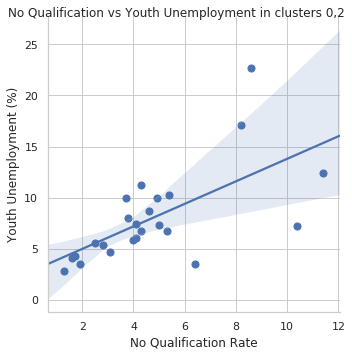

In [65]:
x_vars = ['no_qualif_rate']
y_vars = ['youth_unemployment_rate']
data_gr02 = x[x['group_qualif'].isin([0,2])][qualif_features]
fig = sns.lmplot(data=data_gr02,palette="husl", 
                 scatter_kws={"s": 50, "alpha": 1},
                 x='no_qualif_rate', y='youth_unemployment_rate')
fig.set_xlabels("No Qualification Rate")
fig.set_ylabels("Youth Unemployment (%)")
fig.fig.suptitle("No Qualification vs Youth Unemployment in clusters 0,2")

Text(0.5, 1.0, 'Correlation heatmap of qualification features, groups 0,2')

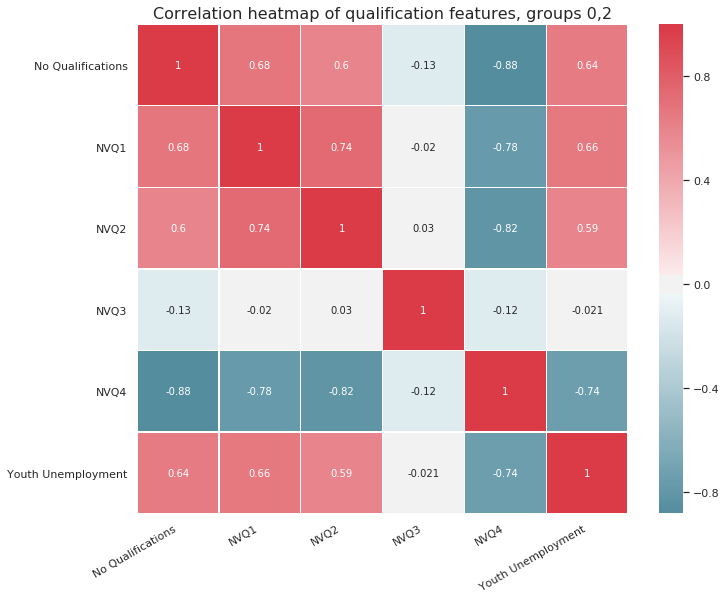

In [66]:
labels=['No Qualifications','NVQ1' , 'NVQ2' ,'NVQ3', 'NVQ4','Youth Unemployment']

# pearson
dcorr = data_gr02[['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate','youth_unemployment_rate']].corr()

#init the figure
fig, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with correlated variables
g = sns.heatmap(dcorr, cmap=cmap, annot=True, center=0, linewidths=.4)

# decorate
g.set_xticklabels(labels=labels, rotation=30, ha='right')
g.set_yticklabels(labels=labels, rotation=0, ha='right')
g.set_title('Correlation heatmap of qualification features, groups 0,2', size=16)

In this case, for groups 0 and 2, there is a much stronger case to be made for the correlation between youth unemployment, lack of education, and higher degrees. Now, the link between lack of qualifications and unemployment is a fairly common thing to state. However, particularly interesting is that on this sample NVQ4 rates seem even more deterministic than no qualification rates for youth unemployment.

In [24]:
data_gr02.groupby('group_qualif').describe().T

group_qualif                           0          2
NVQ1_rate               count  20.000000   4.000000
                        mean    7.730000  12.800000
                        std     1.990001   1.227464
                        min     4.800000  11.300000
                        25%     6.250000  12.350000
                        50%     7.550000  12.800000
                        75%     9.075000  13.250000
                        max    11.500000  14.300000
NVQ2_rate               count  20.000000   4.000000
                        mean   10.670000  16.375000
                        std     1.829610   2.007278
                        min     7.100000  14.600000
                        25%     9.300000  15.200000
                        50%    10.950000  15.850000
                        75%    11.875000  17.025000
                        max    13.700000  19.200000
NVQ3_rate               count  20.000000   4.000000
                        mean   14.135000  13.500000
                        std     2.411873   1.334166
                        min    10.600000  12.000000
                        25%    12.500000  12.825000
                        50%    13.700000  13.400000
                        75%    16.350000  14.075000
                        max    17.700000  15.200000
NVQ4_rate               count  20.000000   4.000000
                        mean   53.930000  32.525000
                        std     3.849279   2.090255
                        min    47.100000  29.800000
                        25%    51.425000  31.675000
                        50%    53.300000  32.750000
                        75%    57.300000  33.600000
                        max    61.600000  34.800000
no_qualif_rate          count  20.000000   4.000000
                        mean    3.740000   9.650000
                        std     1.410636   1.508863
                        min     1.300000   8.200000
                        25%     2.725000   8.500000
                        50%     4.050000   9.500000
                        75%     4.675000  10.650000
                        max     6.400000  11.400000
youth_unemployment_rate count  20.000000   4.000000
                        mean    6.601864  14.889714
                        std     2.489504   6.612213
                        min     2.771333   7.251567
                        25%     4.608213  11.122938
                        50%     6.350562  14.786462
                        75%     8.174113  18.553239
                        max    11.218130  22.734367

In this case NVQ4 rates correlate almost perfectly with lack of qualification rates, and both are deterministic for youth unemployment. In other words, boroughs in these clusters with high rates of people who did not finish highschool have low rates of university graduates, and high youth unemployment rates. This observation, however, is not reliable, due to lack of data.

In [25]:
x[x['group_qualif'] == 0]['area'].unique().tolist()

['Barnet', 'Bromley', 'Harrow', 'Kingston upon Thames', 'Merton']

In [26]:
x[x['group_qualif'] == 2]['area'].unique().tolist()

['Barking and Dagenham']

Would be interesting to check for any socio-economic traits of these boroughs

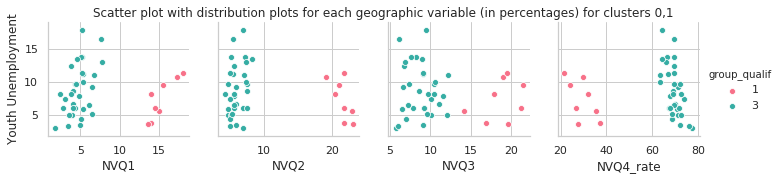

In [110]:
x_vars = ['NVQ1_rate', 'NVQ2_rate', 'NVQ3_rate','NVQ4_rate']
y_vars = ['youth_unemployment_rate']
data_gr13 = x[x['group_qualif'].isin([1,3])][qualif_features]
fig = sns.pairplot(data_gr13, diag_kind='kde', hue='group_qualif',
                   palette="husl", diag_kws=dict(shade=True),
                  x_vars=x_vars, y_vars=y_vars)
replacements={
    'NVQ1_rate':'NVQ1', 
    'NVQ2_rate':'NVQ2', 
    'NVQ3_rate':'NVQ3',
    'NVQ4_rate':'NVQ4',
    'youth_unemployment_rate':'Youth Unemployment'
}
# change axes labels
for i in range(3):
    xlabel = fig.axes[0][i].get_xlabel()
    ylabel = fig.axes[0][i].get_ylabel()
    if xlabel in replacements.keys():
        fig.axes[0][i].set_xlabel(replacements[xlabel])
    if ylabel in replacements.keys():
        fig.axes[0][i].set_ylabel(replacements[ylabel])

fig.fig.suptitle('Scatter plot with distribution plots for each geographic variable (in percentages) for clusters 0,1')
fig.fig.subplots_adjust(top=.9)

Text(0.5, 1.0, 'Correlation heatmap of qualification features, groups 1-3')

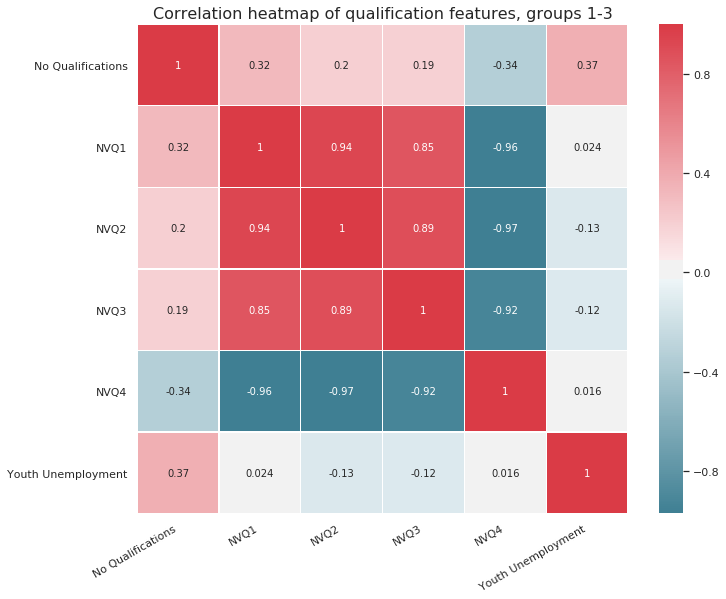

In [54]:
labels=['No Qualifications','NVQ1' , 'NVQ2' ,'NVQ3', 'NVQ4','Youth Unemployment']

# pearson
dcorr = data_gr13[['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate','youth_unemployment_rate']].corr()

#init the figure
fig, ax = plt.subplots(figsize=(11,9))

#draw the heatmap with correlated variables
g = sns.heatmap(dcorr, annot=True, cmap=cmap, linewidths=.4)

# decorate
g.set_xticklabels(labels=labels, rotation=30, ha='right')
g.set_yticklabels(labels=labels, rotation=0, ha='right')
g.set_title('Correlation heatmap of qualification features, groups 1-3', size=16)

Data in groups 1-3 seems to only be useful for describing relationships between qualification rates. No relevant predictors can be drawn here to explain youth unemployment

distribution plots with rug plots to visualise 

Text(0.5, 0, '')

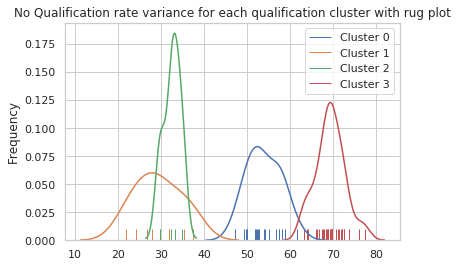

In [103]:
target_0 = x.loc[x['group_qualif'] == 0]
target_1 = x.loc[x['group_qualif'] == 1]
target_2 = x.loc[x['group_qualif'] == 2]
target_3 = x.loc[x['group_qualif'] == 3]

g = sns.distplot(target_0[['NVQ4_rate']], hist=False, rug=True)
g = sns.distplot(target_1[['NVQ4_rate']], hist=False, rug=True)
g = sns.distplot(target_2[['NVQ4_rate']], hist=False, rug=True)
g = sns.distplot(target_3[['NVQ4_rate']], hist=False, rug=True)
g.set_ylabel('Frequency')
g.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
g.set_title('No Qualification rate variance for each qualification cluster with rug plot', size=12)
g.set_xlabel("")

boxplot overlapped with swarmplot to visualise distribution of no qualification rates in groups 0 and 1.

Text(0.5, 0, '')

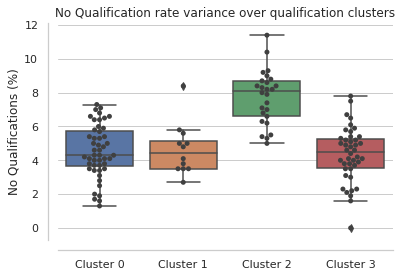

In [97]:
f, ax = plt.subplots()
sns.despine(offset=10, right=True);
g = sns.boxplot(data=df, y='no_qualif_rate', x='group_qualif')
g = sns.swarmplot(x="group_qualif", y="no_qualif_rate", data=df, color=".25")
g.set_ylabel('No Qualifications (%)')
g.set_xticklabels(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
g.set_title('No Qualification rate variance over qualification clusters', size=12)
g.set_xlabel("")

Text(0.5, 0, '')

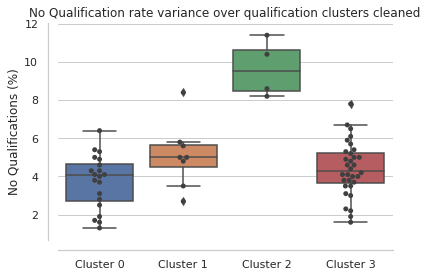

In [98]:
f, ax = plt.subplots()
sns.despine(offset=10, right=True);
g = sns.boxplot(data=x, y="no_qualif_rate", x='group_qualif')
g = sns.swarmplot(x="group_qualif", y="no_qualif_rate", data=x, color=".25")
g.set_ylabel('No Qualifications (%)')
g.set_xticklabels(labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
g.set_title('No Qualification rate variance over qualification clusters cleaned', size=12)
g.set_xlabel("")

Groups 1 & 2 lost most members. Group 3 lost the least, so it seems it was resillient to change over time.

In [32]:
df_gr3 = df_0[df_0['group_qualif'] == 3]

In [33]:
df_gr3.describe()

,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,69.312500,8.821507,4.396875,8.765625,6.021875,4.737500,3.0
std,3.348351,3.872093,1.415464,1.832257,1.079347,1.376707,0.0
min,63.100000,3.092845,1.600000,5.700000,4.300000,1.800000,3.0
25%,67.525000,6.046964,3.650000,7.150000,5.175000,3.875000,3.0
50%,69.400000,8.237198,4.300000,9.100000,5.650000,4.700000,3.0
75%,71.400000,11.297853,5.225000,10.100000,7.025000,5.300000,3.0
max,77.400000,17.959095,7.800000,12.200000,8.300000,7.700000,3.0


Group 3 has the highest youth unemployment mean out of all the clusters, and lowest NVQ1,2,3 rates.

Let's now divert attention towards the geographical features and study the clusters.

In [34]:
df_1.groupby(['group_econ']).agg(['mean', 'std', 'min', 'max']).T

group_econ                                0              1              2
3_year_survival_rate    mean      56.085417      60.657895      53.450000
                        std        3.396869       2.618308       2.004162
                        min       42.100000      55.400000      50.800000
                        max       61.500000      66.700000      55.400000
job_density             mean       0.745625       0.762105       4.315000
                        std        0.426375       0.345081       0.130256
                        min        0.390000       0.430000       4.160000
                        max        2.120000       2.250000       4.450000
3_year_survival_number  mean    1067.083333    1329.276316    3947.500000
                        std      377.890046     502.660060     445.430503
                        min      455.000000     530.000000    3515.000000
                        max     2430.000000    3270.000000    4380.000000
number_of_jobs          mean  134125.000000  132736.842105  706500.000000
                        std    71937.509820   63524.770690   26888.659319
                        min    54000.000000   59000.000000  674000.000000
                        max   344000.000000  379000.000000  737000.000000
youth_unemployment_rate mean      14.178874       6.677526       7.574990
                        std        3.460042       2.224898       3.860844
                        min        7.969365       2.771333       3.420368
                        max       22.734367      11.346710      12.549213

Characteristics: 

        Group 0: lowest survival number, job density, highest unemployment rate, 2x mean of group 1
        Group 1: highest survival rate, lowest unemployment rate, 
        Group 2: highest number of jobs, highest job density, lowest business survival rate

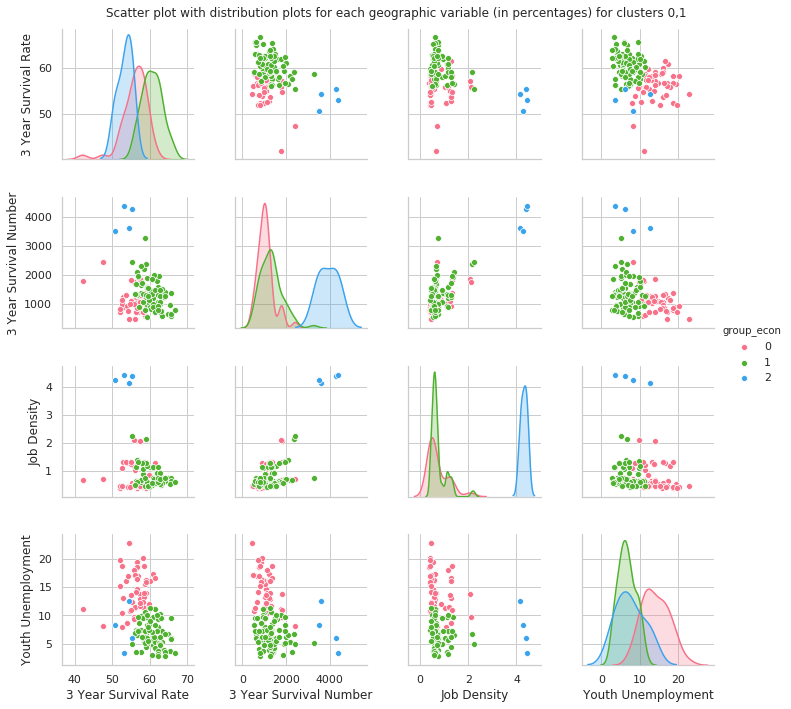

In [81]:
replacements = {
    '3_year_survival_rate': '3 Year Survival Rate', 
    '3_year_survival_number': '3 Year Survival Number', 
    'job_density':'Job Density',
    'youth_unemployment_rate': 'Youth Unemployment'
}

fig = sns.pairplot(df_1, hue='group_econ',
                   palette="husl",
                   vars=['3_year_survival_rate', '3_year_survival_number', 'job_density','youth_unemployment_rate'])


# change axes labels
for i in range(4):
    for j in range(4):
        xlabel = fig.axes[i][j].get_xlabel()
        ylabel = fig.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            fig.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            fig.axes[i][j].set_ylabel(replacements[ylabel])

fig.fig.suptitle('Scatter plot with distribution plots for each geographic variable (in percentages) for clusters 0,1')
fig.fig.subplots_adjust(top=.95)

Text(0.5, 0, '')

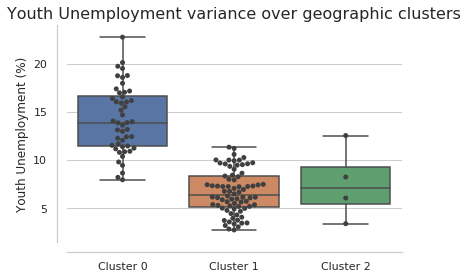

In [96]:
g = sns.boxplot(y='youth_unemployment_rate', x='group_econ', data=df_1)
sns.swarmplot(x="group_econ", y="youth_unemployment_rate", data=df_1, color=".25")
sns.despine(offset=10, right=True);
g.set_ylabel('Youth Unemployment (%)')
g.set_xticklabels(labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
g.set_title('Youth Unemployment variance over geographic clusters', size=16)
g.set_xlabel("")

Average youth unemployment in cluster 0 seems twice as high compared to clusters 1&2. In addition, we must now address cluster 2 and the low sample size.

In [37]:
df_1[df_1['group_econ'] == 2]

,3_year_survival_rate,job_density,3_year_survival_number,number_of_jobs,youth_unemployment_rate,group_econ
31,54.5,4.16,3615.0,674000,12.549213,2
63,50.8,4.26,3515.0,698000,8.255762,2
95,55.4,4.39,4280.0,717000,6.074616,2
127,53.1,4.45,4380.0,737000,3.420368,2


In [38]:
df[df['group_econ'] == 2]['area'].unique().tolist()

['Westminster']

It seems it is just one borough, with a job density 6 times as high as the competition.

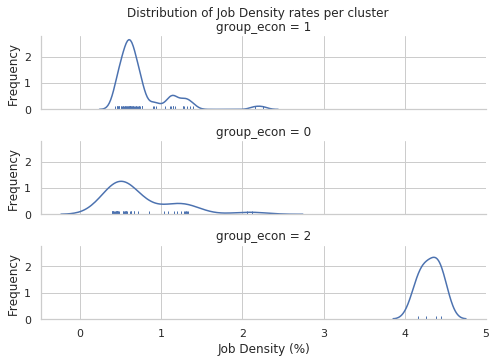

In [73]:
ordered_ = df_1.group_econ.value_counts().index
g = sns.FacetGrid(df_1, row="group_econ", row_order=ordered_,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "job_density", hist=False, rug=True);
g.set_axis_labels("Job Density (%)", "Frequency");
g.fig.suptitle("Distribution of Job Density rates per cluster")
g.fig.subplots_adjust(top=.9)

At this point we can safely treat separately as an Westminster as an outlier. But what about the other 2 groups?

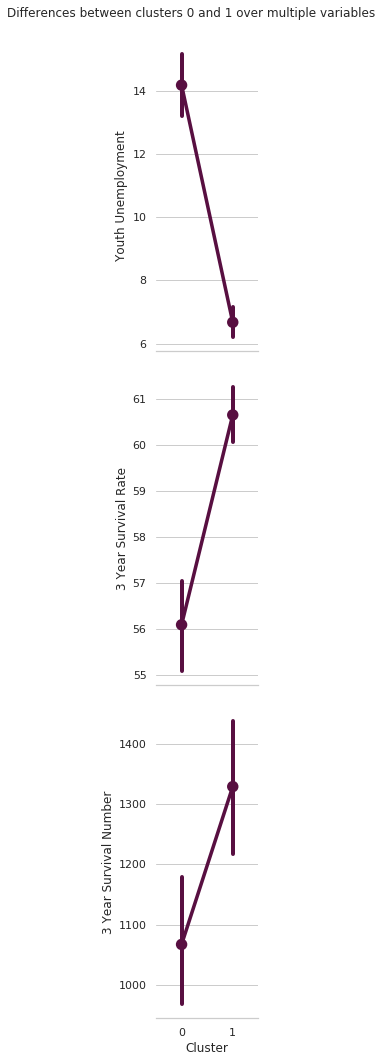

In [118]:
replacements = {
    'youth_unemployment_rate': 'Youth Unemployment',
    '3_year_survival_rate': '3 Year Survival Rate', 
    '3_year_survival_number': '3 Year Survival Number', 
    'group_econ': 'Cluster'
}


g = sns.PairGrid(df_1[df_1['group_econ'].isin([0,1])], y_vars=["youth_unemployment_rate",'3_year_survival_rate', '3_year_survival_number'],
                 x_vars=["group_econ"],
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
sns.despine(fig=g.fig, left=True)

# change axes labels
for i in range(3):
    xlabel = g.axes[i][0].get_xlabel()
    ylabel = g.axes[i][0].get_ylabel()
    if xlabel in replacements.keys():
        g.axes[i][0].set_xlabel(replacements[xlabel])
    if ylabel in replacements.keys():
        g.axes[i][0].set_ylabel(replacements[ylabel])

g.fig.suptitle('Differences between clusters 0 and 1 over multiple variables')
g.fig.subplots_adjust(top=.95)

Between groups 0 and 1 higher survival rates and survival numbers seem to have an inverse relationship with unemployment levels. Let's check this hypothesis

Text(0.5, 1.0, 'Correlation heatmap of geographial features')

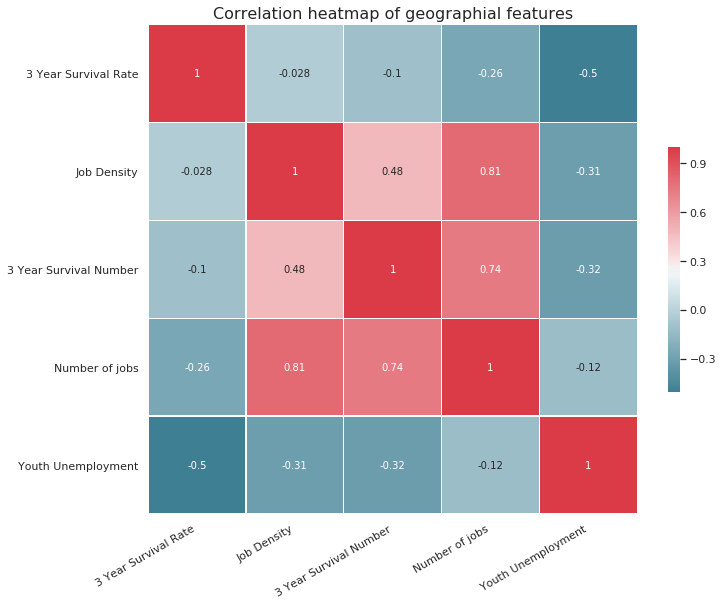

In [53]:
#we can't use pearson here because we have difference scales for our variables, so we use spearman
corr = df_1[['3_year_survival_rate','job_density', '3_year_survival_number','number_of_jobs', 'youth_unemployment_rate']].corr(method='spearman')

labels=['3 Year Survival Rate','Job Density' , '3 Year Survival Number' ,'Number of jobs', 'Youth Unemployment']


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, square=True, linewidths=.4, cbar_kws={"shrink": .5}, annot=True, cmap=cmap)

# decorate
g.set_xticklabels(labels=labels, rotation=30, ha='right')
g.set_yticklabels(labels=labels, rotation=0, ha='right')
g.set_title('Correlation heatmap of geographial features', size=16)

So it seems high business survival rates imply low unemployment rates among youths.

Next check to see how that relationship is modelled. For that reason plot a density contour map with distribution and rug plots, exclude outliers, and run a simple OLS regression.

In [42]:
#slice
xx = df_1[df_1['group_econ'].isin([0,1])]

# get z scores
z = np.abs(stats.zscore(xx['3_year_survival_rate']))

# set a threshold of 2 standard deviations
threshold = 2 * z.std()

labels = ['3 Year Survival Rate', 'Youth Unemployment']

# plot without outliers
fig = px.density_contour(xx[z <= threshold], x="3_year_survival_rate", y="youth_unemployment_rate", color="group_econ", marginal_x="rug", marginal_y="histogram", 
                         labels={'3_year_survival_rate': labels[0], 'youth_unemployment_rate': labels[1]}, trendline='ols')


fig.show()

This density contour map plots the distribution of the data for the 2 groups identified and also fits an OLS trendline. OLS was more appropriate compared to LOWESS, since the data sample is small, and we cannot approximate a function in the case of LOWESS right now for more advanced statistical anaylsis. As most of the data of the 2 groups falls between 5 and 10% unemployment rate, we have quite a bit of overlapping contour lines. The representative regression lines for each cluster (although seemingly flat) have positive and negative slopes respectively. However, the R$^2$ returned to a measly value of 0.01, which means the regression is not a good fit for the data.

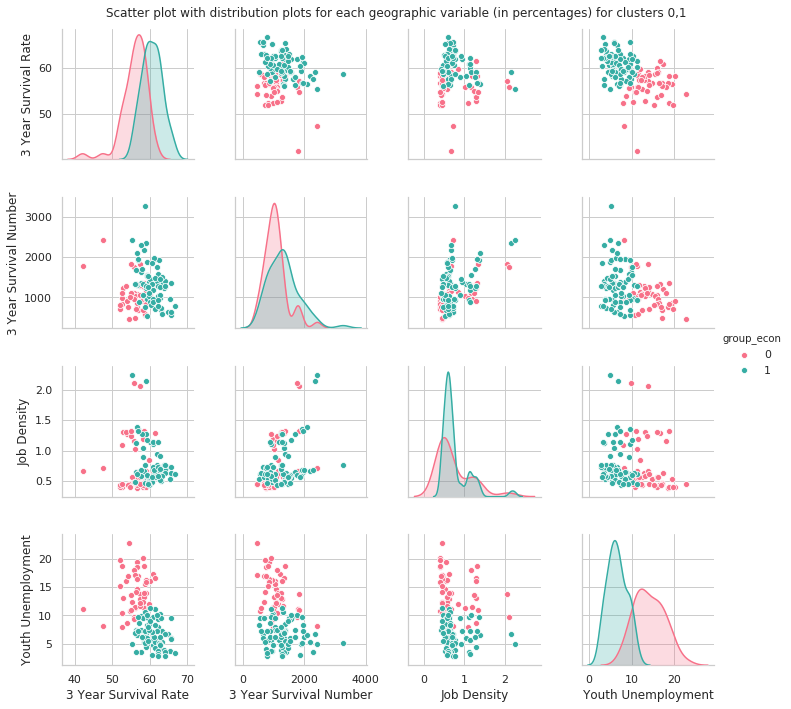

In [80]:
replacements = {
    '3_year_survival_rate': '3 Year Survival Rate', 
    '3_year_survival_number': '3 Year Survival Number', 
    'job_density':'Job Density',
    'youth_unemployment_rate': 'Youth Unemployment'
}

fig = sns.pairplot(df_1[df_1['group_econ'].isin([0,1])], hue='group_econ',
                   palette="husl",
                   vars=['3_year_survival_rate', '3_year_survival_number', 'job_density','youth_unemployment_rate'])

# change axes labels
for i in range(4):
    for j in range(4):
        xlabel = fig.axes[i][j].get_xlabel()
        ylabel = fig.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            fig.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            fig.axes[i][j].set_ylabel(replacements[ylabel])

fig.fig.suptitle('Scatter plot with distribution plots for each geographic variable (in percentages) for clusters 0,1')
fig.fig.subplots_adjust(top=.95)